In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timedelta, Timestamp
from collections import namedtuple

In [2]:
df_estacao = pd.read_csv("DATA/dados_estacoes_2015-2017.csv",
        parse_dates=["DATE"],
        index_col=["DATE"])

df_radar = pd.read_csv("DATA/radar.csv",
                      parse_dates=['date'],
                      index_col=["date"])

df_estacao.sort_index(inplace=True)
df_radar.sort_index(inplace=True)

In [3]:
df_estacao.head()

,MB_ANHA1,MB_ANHA3,MB_ANHA4,MB_ANHA5,MB_ANHA6,MB_ANHA7,MB_ANHA7.1,MB_ANHA8,MB_ANHA8.1,MB_BAL1,...,MB_PRO5,MB_PRO6,MB_SEG1,MB_SEG1.1,MB_SEG2,MB_SEG3,MB_SEG3A,MB_SEG6,MB_SEG6A,MB_SEG9
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_radar.head()

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:05:00,0.0,0.0,0.0,0.0,0.01000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.022635,0.0,0.0,0.000000,0.000000
2016-01-01 00:15:00,0.0,0.0,0.0,0.0,0.01568,0.0,0.01706,0.0,0.023243,0.01119,...,0.0,0.0,0.0,0.0,0.0,0.041947,0.0,0.0,0.000000,0.013246
2016-01-01 00:25:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.01030,0.0,0.016520,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.010300,0.0,0.0,0.000000,0.000000
2016-01-01 00:40:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.028753,0.000000
2016-01-01 00:45:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.014679,0.0,0.0,0.013946,0.000000


Compatibilizando o tempo nos dois datasets.
 - O dados do radar estão acumulados a cada 10min, sendo 00:05:00 o acumulado do 00:00:00 até os 00:10:00.
 - Separando a janela de tempo onde existem dados dos dois.
 - O dados de radar estão em uma fuso hórario diferente.


In [5]:
df_est = df_estacao.groupby(pd.Grouper(freq="10min")).sum()
df_est.head()

,MB_ANHA1,MB_ANHA3,MB_ANHA4,MB_ANHA5,MB_ANHA6,MB_ANHA7,MB_ANHA7.1,MB_ANHA8,MB_ANHA8.1,MB_BAL1,...,MB_PRO5,MB_PRO6,MB_SEG1,MB_SEG1.1,MB_SEG2,MB_SEG3,MB_SEG3A,MB_SEG6,MB_SEG6A,MB_SEG9
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_radar.index[0]

Timestamp('2016-01-01 00:05:00')

In [7]:
df_radar.index[0]  - Timedelta("5min")

Timestamp('2016-01-01 00:00:00')

In [8]:
df_rad = df_radar.copy()
df_rad.index = df_radar.index - Timedelta("5min")
df_rad.head()

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.01000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.022635,0.0,0.0,0.000000,0.000000
2016-01-01 00:10:00,0.0,0.0,0.0,0.0,0.01568,0.0,0.01706,0.0,0.023243,0.01119,...,0.0,0.0,0.0,0.0,0.0,0.041947,0.0,0.0,0.000000,0.013246
2016-01-01 00:20:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.01030,0.0,0.016520,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.010300,0.0,0.0,0.000000,0.000000
2016-01-01 00:35:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.028753,0.000000
2016-01-01 00:40:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.014679,0.0,0.0,0.013946,0.000000


In [9]:
df_radar.index.min()

Timestamp('2016-01-01 00:05:00')

In [10]:
df_radar.index.max()

Timestamp('2018-06-13 23:55:00')

In [11]:
df_est = df_est[df_radar.index.min():df_radar.index.max()]
df_est.head()

,MB_ANHA1,MB_ANHA3,MB_ANHA4,MB_ANHA5,MB_ANHA6,MB_ANHA7,MB_ANHA7.1,MB_ANHA8,MB_ANHA8.1,MB_BAL1,...,MB_PRO5,MB_PRO6,MB_SEG1,MB_SEG1.1,MB_SEG2,MB_SEG3,MB_SEG3A,MB_SEG6,MB_SEG6A,MB_SEG9
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


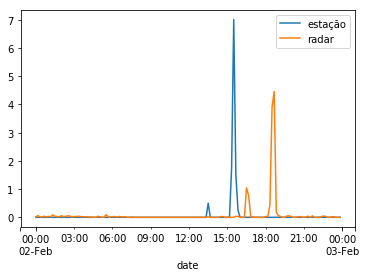

In [12]:
plt.figure()
df_est["2016-02-02"]["MB_PRO1"].plot(label="estação")
df_rad["2016-02-02"]["MB_PRO1"].plot(label="radar")

plt.legend()

In [13]:
Horariodeverao = namedtuple("Horariodeverao",["inicio", "final"])
horariosdeverao = [Horariodeverao(Timestamp("2015-10-16"),Timestamp("2016-02-18")),
                  Horariodeverao(Timestamp("2015-10-15"),Timestamp("2016-02-17")),
                  Horariodeverao(Timestamp("2015-11-4"),Timestamp("2016-02-16"))]


In [14]:
horariosdeverao[0].inicio

Timestamp('2015-10-16 00:00:00')

In [15]:
indices = df_rad.index
new_indices = []
isHorariodeverao = False
for indice in indices:
    for horariodeverao in horariosdeverao:
        if indice >= horariodeverao.inicio and indice <= horariodeverao.final:
            isHorariodeverao = True
    if isHorariodeverao:
        delta = Timedelta("3Hours")
    else:
        delta = Timedelta("4Hours")
    new = indice - delta
    new_indices.append(new)
    
    isHorariodeverao = False


In [16]:
df_radar_corr = df_rad.copy()
df_radar_corr.index = new_indices

Comparação no horario de verão

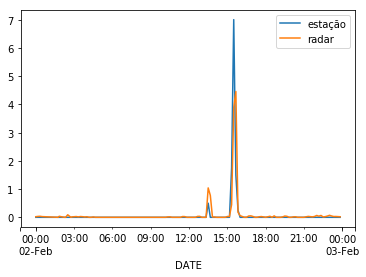

In [17]:
plt.figure()
df_est["2016-02-02"]["MB_PRO1"].plot(label="estação")
df_radar_corr["2016-02-02"]["MB_PRO1"].plot(label="radar")

plt.legend()

Comparação fora do horario de verao

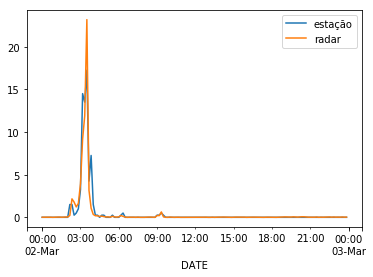

In [18]:
plt.figure()
df_est["2016-03-02"]["MB_PRO1"].plot(label="estação")
df_radar_corr["2016-03-02"]["MB_PRO1"].plot(label="radar")

plt.legend()

Houve um tipo de sobreposição por causa do horario de verao. Na minha opiniao a melhor saida e pegar o valor maximo.

In [19]:
df_radar_corr.index[df_radar_corr.index.duplicated()]

DatetimeIndex(['2016-02-17 20:10:00', '2016-02-17 20:20:00',
               '2016-02-17 20:30:00', '2016-02-17 20:40:00',
               '2016-02-17 20:50:00', '2016-02-17 21:00:00'],
              dtype='datetime64[ns]', freq=None)

In [21]:
duplicateds = df_radar_corr.index[df_radar_corr.index.duplicated()]
for duplicated in duplicateds:

    max_ = df_radar_corr.loc[duplicated].max(axis=0,level=0)
    
    df_radar_corr = df_radar_corr.drop(index=duplicated,axis=1)
    
    df_radar_corr = df_radar_corr.append(max_)


In [22]:
df_radar_corr.index[df_radar_corr.index.duplicated()]

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [27]:
df_radar_corr.index.name= "DATE"

In [28]:
df_radar_corr.head()

,MB_SEG2,MB_LAG3,MB_SEG3A,MB_LAG2,MB_LAJ8,MB_LAJ1,MB_ANHA8,MB_LAG5,MB_PRO3,MB_IMB6,...,MB_LAJ4,MB_SEG6A,MB_SEG3,MB_BAND4,MB_IMB3,MB_SEG6B,MB_BAND3,MB_LAJ5,MB_SEG5A,MB_BAND1A
DATE,,,,,,,,,,,,,,,,,,,,,
2015-12-31 21:00:00,0.0,0.0,0.0,0.0,0.01000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.022635,0.0,0.0,0.000000,0.000000
2015-12-31 21:10:00,0.0,0.0,0.0,0.0,0.01568,0.0,0.01706,0.0,0.023243,0.01119,...,0.0,0.0,0.0,0.0,0.0,0.041947,0.0,0.0,0.000000,0.013246
2015-12-31 21:20:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.01030,0.0,0.016520,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.010300,0.0,0.0,0.000000,0.000000
2015-12-31 21:35:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.028753,0.000000
2015-12-31 21:40:00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.014679,0.0,0.0,0.013946,0.000000


In [29]:
df_est.to_csv("DATA/dados_estacoes_5min.csv")
df_radar_corr.to_csv("DATA/dados_radar_semHorarioVerao.csv")